___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
x_train[8].shape

(28, 28)

In [7]:
x_train[10].shape

(28, 28)

In [8]:
x_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   1,   0,   0,   1,   1,   0,   0,   0,   0,  58,   0,  39,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   0,   0,   0,   0,   0,   0,   0,  64, 109, 146, 192, 193,
          7,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,  94,  38,  99, 209, 183, 229, 192, 142,  48,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,  41,  45, 158, 146, 164, 114,  51,   1,  53, 105,  42,  36,
          0,   0],
       [  

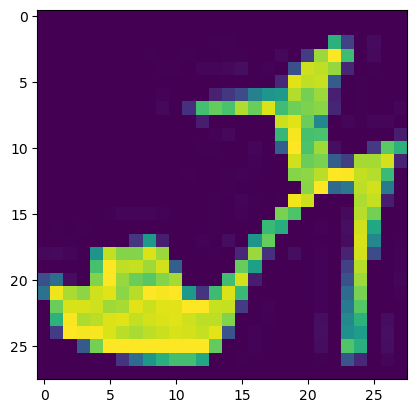

In [9]:
plt.imshow(x_train[9])

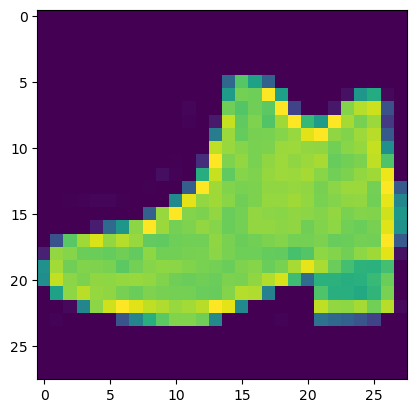

In [10]:
plt.imshow(x_train[15])

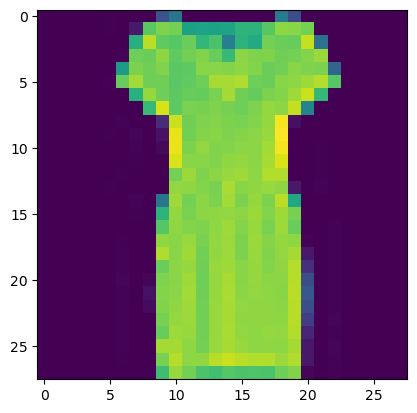

In [11]:
plt.imshow(x_train[20])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
x_train[8].min()

0

In [13]:
x_train[8].max()

255

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [15]:
x_train[8].min()

0.0

In [16]:
x_train[8].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [20]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
y_test.shape

(10000,)

In [25]:
y_train.shape

(60000,)

In [26]:
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_test.shape

(10000, 10)

In [27]:
y_test.shape

(10000, 10)

In [28]:
y_train.shape

(60000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input

model = Sequential()

# Define the input shape using an Input layer
model.add(Input(shape=(28, 28, 1)))

# Add the layers
model.add(Conv2D(filters=28, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 17500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241,698 (8.55 MB)

 Trainable params: 2,241,698 (8.55 MB)

 Non-trainable params: 0 (0.00 B)

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [33]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8049 - loss: 0.5554 - val_accuracy: 0.8779 - val_loss: 0.3429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9056 - loss: 0.2589 - val_accuracy: 0.9002 - val_loss: 0.2835
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9238 - loss: 0.2108 - val_accuracy: 0.9051 - val_loss: 0.2706
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9346 - loss: 0.1808 - val_accuracy: 0.9096 - val_loss: 0.2741
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9413 - loss: 0.1590 - val_accuracy: 0.9108 - val_loss: 0.2804
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9512 - loss: 0.1354 - val_accuracy: 0.9089 - val_loss: 0.2873
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9577 - loss: 0.1220 - val_accuracy: 0.9083 - val_loss: 0.3420
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9620 -

**TASK 7: Plot values of metrics you used in your model.**

In [34]:
model.metrics_names

['loss', 'compile_metrics']

In [35]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.859683,0.394268,0.8779,0.342888
1,0.906500,0.257149,0.9002,0.283529
2,0.923050,0.212972,0.9051,0.270625
3,0.933317,0.184432,0.9096,0.274069
4,0.941700,0.161393,0.9108,0.280432


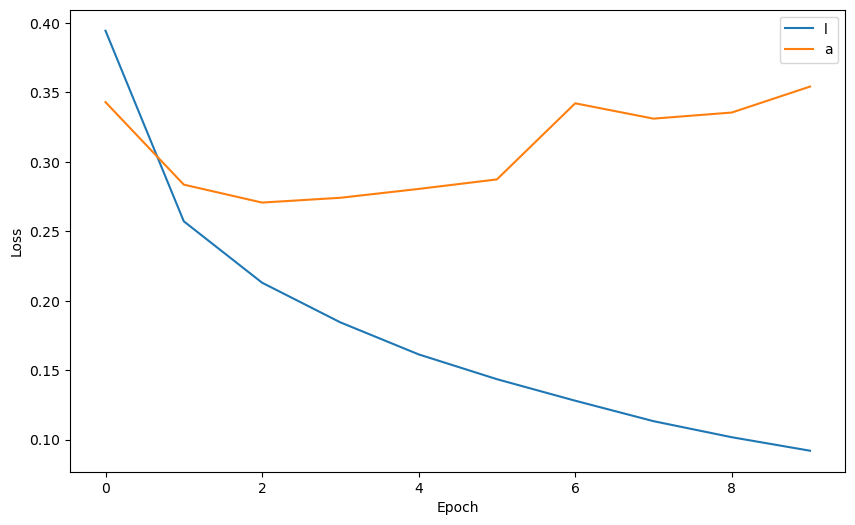

In [36]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

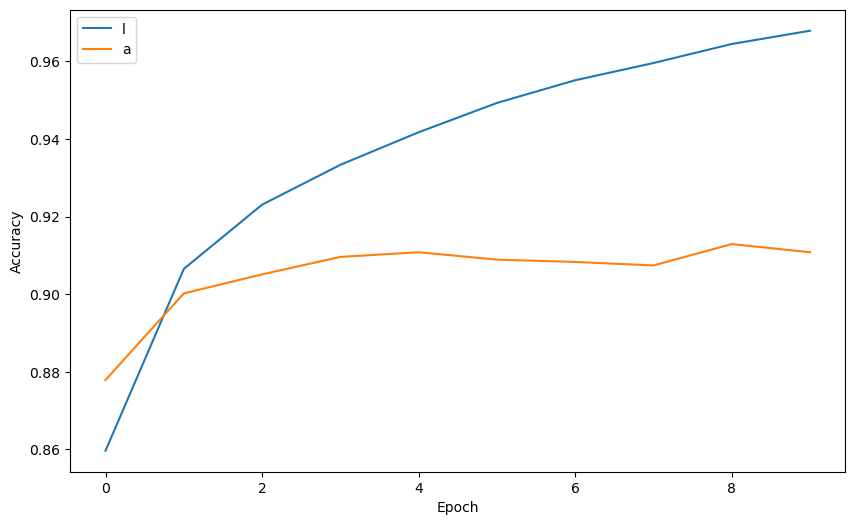

In [37]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [38]:
print(model.evaluate(x_test,y_test,verbose=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9077 - loss: 0.3756
[0.35408392548561096, 0.9107999801635742]


In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [41]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9717 - loss: 0.0813 - val_accuracy: 0.9046 - val_loss: 0.4062
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9753 - loss: 0.0696 - val_accuracy: 0.9141 - val_loss: 0.4184
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9782 - loss: 0.0626 - val_accuracy: 0.9043 - val_loss: 0.4348


In [42]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.970817,0.084058,0.9046,0.406181
1,0.974033,0.074447,0.9141,0.418397
2,0.976283,0.069325,0.9043,0.434764


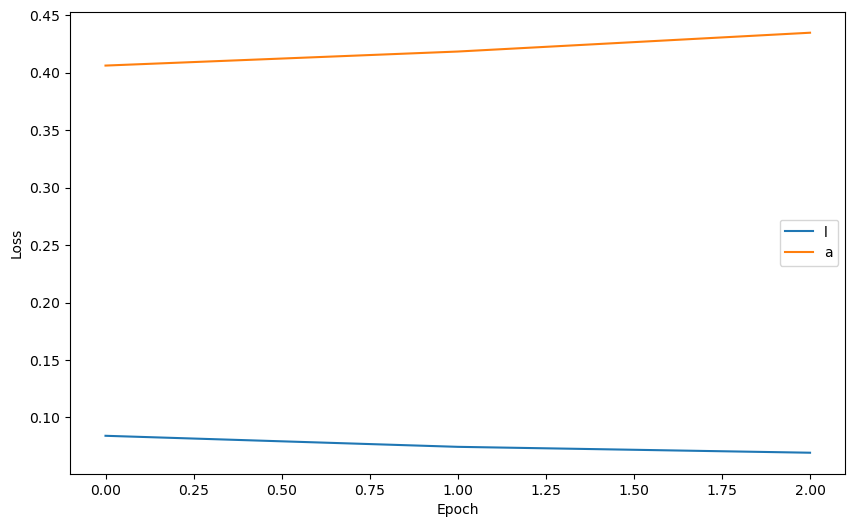

In [43]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

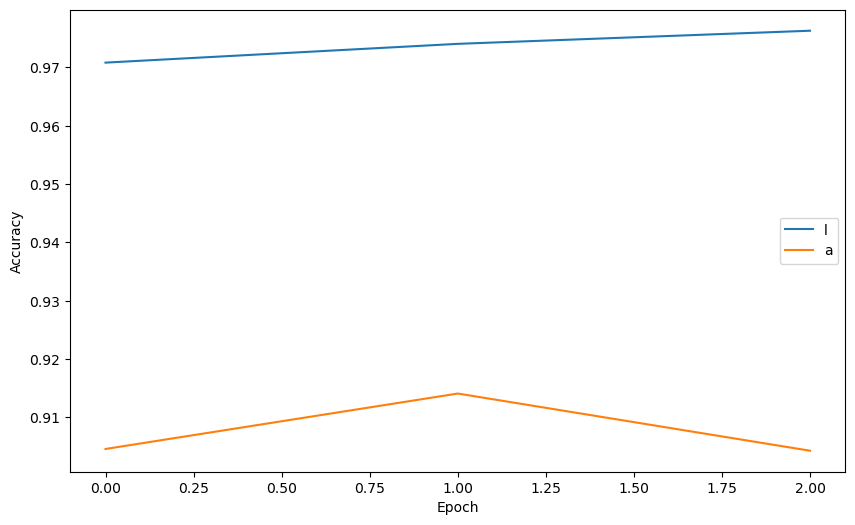

In [44]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
preds = model.predict(x_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[4.1560761e-12, 1.1150355e-12, 9.5176861e-13, ..., 2.1347191e-07,
        5.9227165e-11, 9.9999976e-01],
       [7.4199647e-06, 2.2692017e-37, 9.9999261e-01, ..., 3.0681685e-26,
        2.9054024e-20, 7.1140451e-22],
       [6.9700468e-11, 1.0000000e+00, 6.8425409e-14, ..., 1.0659899e-15,
        6.2605445e-14, 1.2170923e-15],
       ...,
       [8.5088331e-17, 4.1596510e-21, 7.5694786e-15, ..., 1.0771770e-17,
        1.0000000e+00, 2.0331050e-15],
       [3.1507888e-13, 1.0000000e+00, 2.0861517e-15, ..., 2.3544397e-18,
        3.5157546e-14, 4.3040041e-14],
       [2.2406534e-03, 5.5023087e-05, 5.7772275e-02, ..., 5.7428706e-01,
        1.5965702e-04, 1.7358223e-01]], dtype=float32)

In [47]:
preds[0]

array([4.1560761e-12, 1.1150355e-12, 9.5176861e-13, 4.6994756e-15,
       1.0455756e-14, 4.7224678e-08, 8.0712254e-17, 2.1347191e-07,
       5.9227165e-11, 9.9999976e-01], dtype=float32)

In [48]:
predictions= np.argmax(preds, axis=1)

In [49]:
len(predictions)

10000

In [50]:
predictions

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [51]:
#print(confusion_matrix(y_test, predictions))

## Prediction

In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4347640573978424
Test accuracy: 0.9042999744415283


In [54]:
my_number = x_test[6]

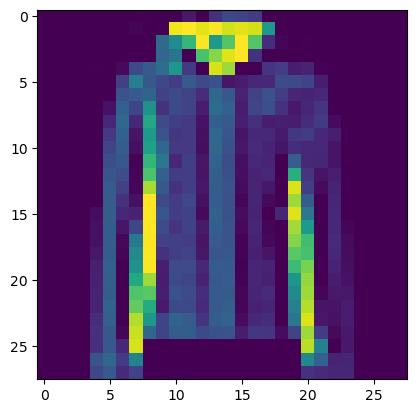

In [55]:
plt.imshow(my_number.reshape(28,28));

In [56]:
model.predict(my_number.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[8.8319518e-11, 2.4309668e-15, 5.6239891e-01, 2.7383364e-13,
        4.3756127e-01, 1.4790598e-13, 3.9879553e-05, 1.6714233e-20,
        2.0606050e-20, 8.5482590e-15]], dtype=float32)

In [57]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([2], dtype=int64)

In [59]:
model.save("cnn_image_fashion.keras")
#model.save("cnn_image_fashion.h5")


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___